# Campus recruitment dataset

dataset from Kaggle https://www.kaggle.com/benroshan/factors-affecting-campus-placement


<b>Copy from Kaggle description</b>

Hello
My name is Ben Roshan D, doing MBA in Business Analytics at Jain University Bangalore . We have practical sessions in Python,R as subjects. Faculties provide us with such data sets to work on with it, So here is one of the data set which our class worked on

What is in it?
This data set consists of Placement data of students in our campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students

Acknowledgement
I would like to thank Dr. Dhimant Ganatara, Professor Jain University for helping the students by providing this data for us to train R programming

Questions
- Which factor influenced a candidate in getting placed?
- Does percentage matters for one to get placed?
- Which degree specialization is much demanded by corporate?
- Play with the data conducting all statistical tests.


In [7]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [8]:
#import data
raw_data = pd.read_csv('Placement_Data_Full_Class.csv')

In [9]:
#Explore data set
raw_data.info()
# 15 columns, 215 data points except salary column (148 total) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [10]:
raw_data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


# Note: Variable descriptions from Kaggle

- sl_no: Serial number
- gender: Male='M',Female='F'
- ssc_p: Secondary Education percentage- 10th Grade
- ssc_b: Board of Education- Central/ Others
- hsc_p: Higher Secondary Education percentage- 12th Grade
- hsc_b: Board of Education- Central/ Others
- degree_p: Degree Percentage
- degree_t: Under Graduation(Degree type)- Field of degree educatio
- workex: Work Experience
- etest_p: No description
- specialisation: No description but looks like MBA specialization area
- mba_p: No description assumption - mba percentage?
- status: placement status Placed or Not Placed
- Salary: Salary of those who are placed

https://www.kaggle.com/benroshan/factors-affecting-campus-placement ref: data summary page 

In [11]:
raw_data.head()
# Cateegorical data --> Gender, ssc_b, hsc_b, degree_t, workep, specialisation, status

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


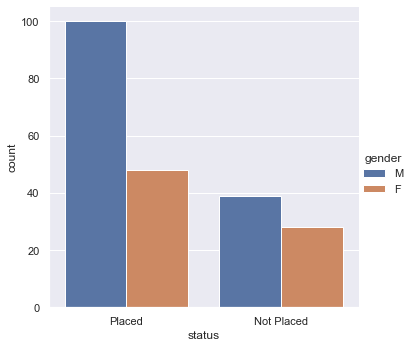

In [12]:
# Compare numbers of Placrd / not placed X gender
sns.catplot(x="status", kind="count", hue = "gender", data=raw_data);

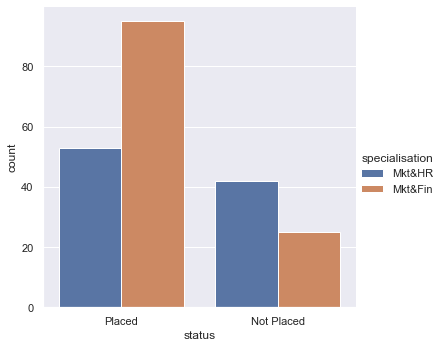

In [13]:
# Compare numbers of Placrd / not placed X gender
sns.catplot(x="status", kind="count", hue = "specialisation", data=raw_data);
# Mkt/Fin specification are more likely to be placed

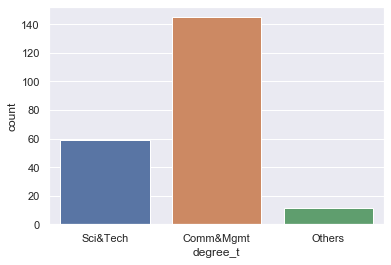

In [14]:
# How about degree
sns.countplot(x="degree_t", data=raw_data);

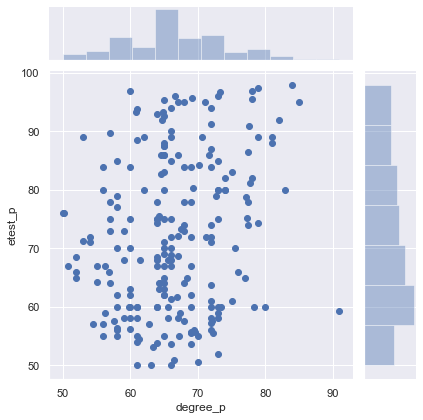

In [15]:
sns.jointplot(x='degree_p',y='etest_p',data=raw_data)
# No relationship between theese variables 

Text(0.5, 1.0, 'Salary distribution')

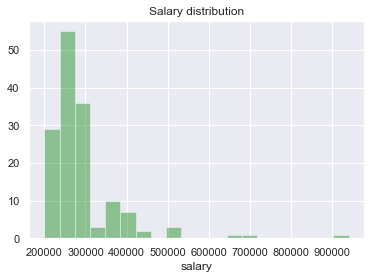

In [16]:
#Salary distributuin visualization
sns.distplot(raw_data['salary'],bins=20,kde=False,color='green')
plt.title('Salary distribution')

In [17]:
# Specialization X placement status
# Convert binary categorical columns to numerical values. Copy dataset
df1 = raw_data.copy()
df1['status'] = df1['status'].map({'Placed':1, 'Not Placed':0})
df1['workex'] = df1['workex'].map({'Yes':1, 'No':0})
df1['gender'] = df1['gender'].map({'M':1, 'F':0})
df1.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1,270000.0
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1,200000.0
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,1,250000.0
3,4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,0,NaN
4,5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,1,425000.0


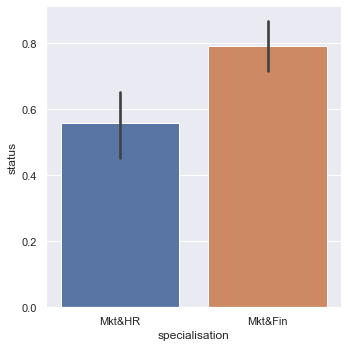

In [18]:
# Specialization X placement status
sns.catplot(x="specialisation", y="status", kind="bar", data=df1);
# Mktg & Finance specification has higher chance to be placed

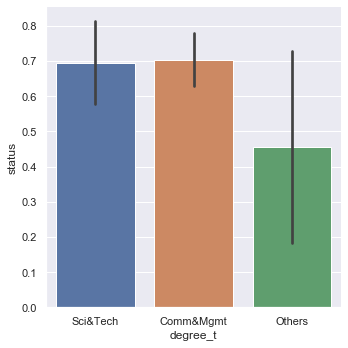

In [19]:
# obtain number of variables for other categorical features 
# ssc_b, hsc_b, and degree_t
# degree_t
sns.catplot(x="degree_t", y="status", kind="bar", data=df1);

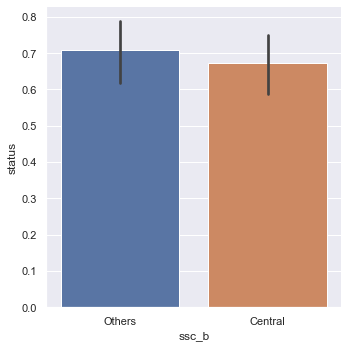

In [20]:
# obtain number of variables for other categorical features 
# ssc_b
sns.catplot(x="ssc_b", y="status", kind="bar", data=df1);
# Not much explanation what this feature means. Also it seems like this is not the differentiation factor so... drop it 

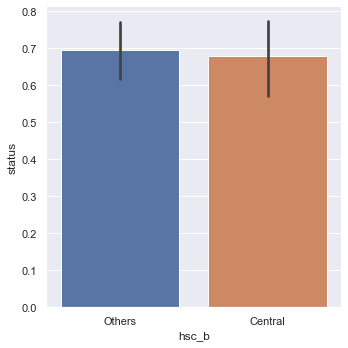

In [21]:
# obtain number of variables for other categorical features 
# hsc_b
sns.catplot(x="hsc_b", y="status", kind="bar", data=df1);
# Not much explanation what this feature means. Also it seems like this is not the differentiation factor so... drop it 

## Clean up data

- Drop unnessesary features 
- Convert categorical variables to numerical columns

In [22]:
# Drop columns sl_no, ssc_b and hsc_b
df1.drop(['sl_no', 'ssc_b','hsc_b'], axis = 1, inplace = True)

In [23]:
df1.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1,270000.0
1,1,79.33,78.33,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1,200000.0
2,1,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,1,250000.0
3,1,56.00,52.00,Science,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,0,NaN
4,1,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,1,425000.0


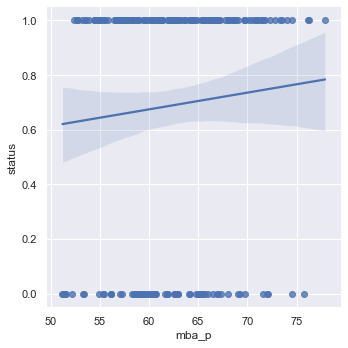

In [24]:
# Relationship between mba_p and placement status
sns.lmplot(x='mba_p',y='status',data=df1);

Text(0.5, 1, 'Correlation plot')

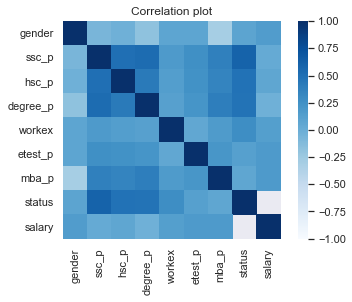

In [25]:
#Explore correlation
sns.heatmap(df1.corr(), cmap='Blues', square=True, vmin=-1, vmax=1, center=0,)
plt.title('Correlation plot')
# Highest correlation is observed with ssc_p

In [29]:
# get dummies for specialization column
df_specialisation = pd.get_dummies(df1['specialisation']) 
df_degree = pd.get_dummies(df1['degree_t']) 
df_hsc = pd.get_dummies(df1['hsc_s']) 
df2 = pd.concat([df1, df_specialisation, df_degree, df_hsc], axis=1)
df2.drop(['hsc_s', 'degree_t','specialisation', 'salary'], axis = 1, inplace = True)

# I have a feeling this could be written much smarter, shorter.... will explore

In [30]:
df2.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,status,Mkt&Fin,Mkt&HR,Comm&Mgmt,Others,Sci&Tech,Arts,Commerce,Science
0,1,67.00,91.00,58.00,0,55.0,58.80,1,0,1,0,0,1,0,1,0
1,1,79.33,78.33,77.48,1,86.5,66.28,1,1,0,0,0,1,0,0,1
2,1,65.00,68.00,64.00,0,75.0,57.80,1,1,0,1,0,0,1,0,0
3,1,56.00,52.00,52.00,0,66.0,59.43,0,0,1,0,0,1,0,0,1
4,1,85.80,73.60,73.30,0,96.8,55.50,1,1,0,1,0,0,0,1,0


# Create machine learning model to predict Placement

Variables (all numerical variables except salary)
- gender
- ssc_p
- hsc_p	degree_p
- workex
- etest_p
- mba_p
- Mkt&Fin
- Mkt&HR
- Comm&Mgmt
- Others
- Sci&Tech
- Art
- Commerce
- Science

In [31]:
from sklearn.model_selection import train_test_split

In [40]:
variables = ['gender','ssc_p','hsc_p','degree_p','workex','etest_p', 'mba_p', 'Mkt&Fin', 'Mkt&HR', 'Comm&Mgmt', 'Others', 'Sci&Tech', 'Arts', 'Commerce', 'Science' ]
X = df2[variables]
y = df2['status']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [38]:
from sklearn.linear_model import LogisticRegression

In [42]:
logmodel_1 = LogisticRegression()
logmodel_1.fit(X_train,y_train)

/Users/ai.miyazawa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
predictions = logmodel_1.predict(X_test)

## Evaluation

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75        21
           1       0.87      0.91      0.89        44

    accuracy                           0.85        65
   macro avg       0.83      0.81      0.82        65
weighted avg       0.84      0.85      0.84        65



In [48]:
score = logmodel_1.score(X_test, y_test)
print(score)

0.8461538461538461


In [50]:
from sklearn import metrics

In [51]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[15  6]
 [ 4 40]]


In [53]:
# TO DO: Explore which feature contrinutes heavily for the prediction
# cont. to 2nd round of iteration